In [ ]:
aO -3.479249259777e+01 a1 -1.103564847459e+00 a2 -1.81759550108ge-13
a3 1.913718292296e-13 a4 -8.296778314084e-15 a5 -3.945007662626e-14
a6 1.480375530361e-14 a7 -2.096231848232e-15 a8 1.067937159826e-16

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate

M = 1.67e-27*2 #[kg] mass of H2 molecule
m = 9.1e-31 #[kg] mass of electorn
k = 1.38064852e-23/1.6e-19 #[eV/K]
k1 = 1.38064852e-23 #[m2 kg s-2 K-1]
T =  300 # [K]

print(T)
# H2+ + e -> 2H Janev++ 73p k8
# H3+ + e -> H2 + H Janev++ 98p k9
# H2+ + H2 -> H3+ + H Janev++ 88p 하단부터 k11

def xsk7(Te):
    return np.exp(-8.734971153234e+01+1.018145800541e+02*np.log(Te)-7.763161913681e+01*(np.log(Te))**2+3.095286370113e+01*(np.log(Te))**3-7.178129093553e+00*(np.log(Te))**4+1.001376002948e+00*(np.log(Te))**5-8.276605899370e-02*(np.log(Te))**6+3.731813613454e-03*(np.log(Te))**7-7.068946002778e-05*(np.log(Te))**8)

def xsk8_2(Te):
    return np.exp(-3.479249259777e+01-1.103564847459e+00*np.log(Te)-1.817595501089e-13*(np.log(Te))**2\
                  +1.913718292296e-13*(np.log(Te))**3-8.296778314084e-15*(np.log(Te))**4-3.945007662626e-14*(np.log(Te))**5\
                  +1.480375530361e-14*(np.log(Te))**6-2.096231848232e-15*(np.log(Te))**7+1.067937159826e-16*(np.log(Te))**8)
def xsk8(E):
    return 17.3e-20*(1/(E*(1+1.1*E**0.512+0.011*E**3.1))+0.133*np.exp(-0.35*(E-6.05)**2))

def xsk9(E):
    return 3e-20/(E**0.725*(1+4.45*E**1.2))+1/(1/(0.0646*E**1.478*1e-16)+1/(634.22/E**2.605*1e-16))

def xsk11(Te):
    return 17.76e-20/(Te**0.477*(1+0.0291*Te**3.61+1.53e-5*Te**6.55)) #[m2 단위]

def maxwellian_v(v,M):
    return (M/2/np.pi/k1/T)**1.5*4*np.pi*v**2*np.exp(-M*v**2/2/k1/T)

def eV_to_m_s(E,M):
    return np.sqrt(2*E*1.6e-19/M) #[m/s]

300


<img src = 'H3+.png' width="50%">
<img src = 'Lieber_max.png' width="60%">

In [127]:
#Energy setting
E_list = np.arange(1e-50, 0.5,1e-5) #[eV]
v_list = eV_to_m_s(E_list,M) #[m/s]
#Cross section setting [m2]
xs_list = xsk11(E_list)
xs_list[0]=0
result = integrate.trapz(maxwellian_v(v_list,M)*xs_list,v_list)
print(result*1e6) #[cm3/s]

1.130526815529374e-12


In [119]:
Te = 300*k
k8 = np.exp(-1.670435653561e+01-6.035644995682e-01*np.log(Te)-1.942745783445e-08*(np.log(Te))**2-2.005952284492e-07*(np.log(Te))**3+2.962996104431e-08*(np.log(Te))**4+2.134293274971e-08*(np.log(Te))**5-6.353973401838e-09*(np.log(Te))**6+6.152557460831e-10*(np.log(Te))**7-2.025361858319e-11*(np.log(Te))**8)
print(k8)

5.048789599682088e-07


1.0000034661668205


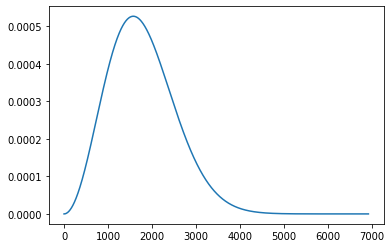

In [126]:
plt.plot(v_list,maxwellian_v(v_list,M))
result = integrate.trapz(maxwellian_v(v_list,M),v_list)
print(result)

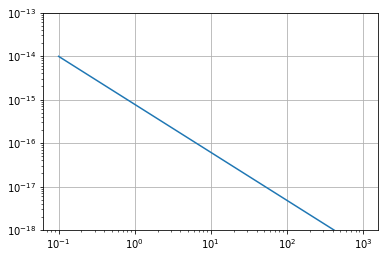

In [29]:
E_list = np.arange(0.1,1e3,1e-2)
plt.plot(E_list,xsk8_2(E_list))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-18,1e-13)
plt.grid(True,axis='both')
plt.savefig('ad.png')

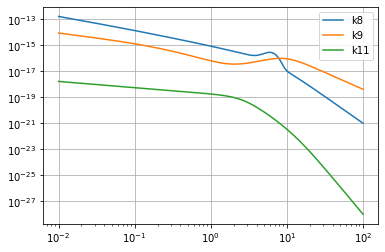

In [240]:
plt.plot(E_list,xsk8(E_list),E_list,xsk9(E_list),E_list,xsk11(E_list))
plt.xscale("log")
plt.yscale('log')
plt.legend(['k8','k9','k11','k11_2'],loc = 'upper right')
plt.grid(True)

In [41]:
data = pd.DataFrame(xsk11(E_list),E_list)
data.to_csv('k11.csv',sep='\t')

In [28]:
1/40

0.025

In [35]:
data.to_csv?